## Import Library

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Data Preprocessing

In [4]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/bayujo/bank-marketing-dataset-best-model-algorithm/main/dataset/bank-additional-full.csv', sep=';')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [7]:
# Instantiate LabelEncoder object
le = LabelEncoder()

# Select categorical variables to be converted
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

# Convert categorical variables using LabelEncoder
for var in cat_vars:
    df[var] = le.fit_transform(df[var])

# Show the resulting data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [8]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Logistic Regression

Model accuracy: 0.910536537994659 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.42      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238


Confusion matrix:


<Axes: >

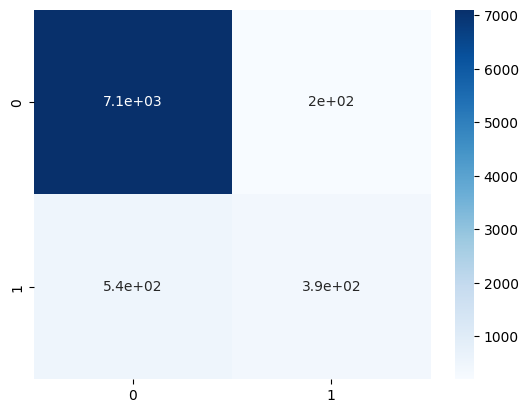

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model accuracy:", accuracy, "\n")
print(report)
print("\nConfusion matrix:")
sns.heatmap(cm, annot=True, cmap='Blues')

## K-Nearest Neighbors

In [11]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Best Parameters: {'n_neighbors': 11}
Best Score: 0.9041274658573597


Accuracy: 0.9039815489196407 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7303
           1       0.64      0.35      0.45       935

    accuracy                           0.90      8238
   macro avg       0.78      0.66      0.70      8238
weighted avg       0.89      0.90      0.89      8238



<Axes: >

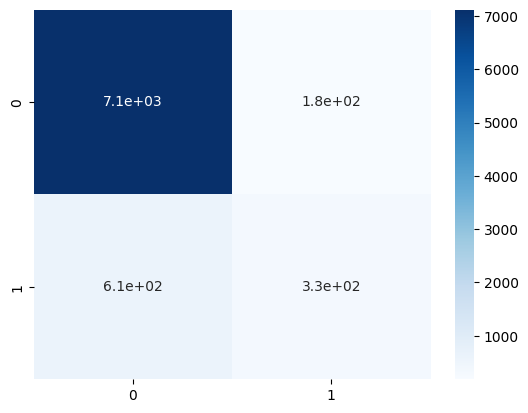

In [12]:
k = 19
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}", "\n")

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')

## SVM

Best Parameters: {'C': 1}
Best Accuracy: 0.9093171471927162

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.40      0.50       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238


Accuracy Score: 0.9095654285020636
Confusion Matrix:



<Axes: >

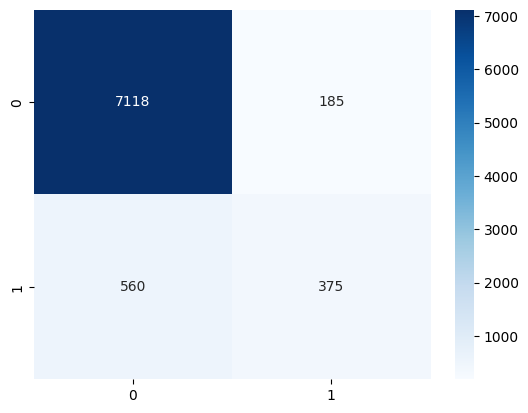

In [13]:
# Define SVM model
svm = SVC(random_state=42)

# Define grid search parameters
param_grid = {
    'C': [0.1, 1, 10, 100]
}

# Perform grid search
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Make predictions on test set using best estimator
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test_scaled)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

## Decision Tree

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7303
           1       0.50      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238

Model accuracy: 0.8867443554260743


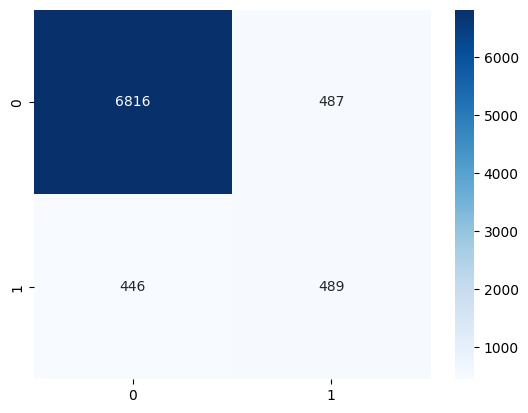

In [14]:
clf = DecisionTreeClassifier()
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

report = classification_report(y_test, y_pred)
print(report)

accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy:', accuracy)

## Random Forest

In [ ]:
# Define parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250]
}

# Create grid search object
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit grid search object to training data
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and corresponding mean cross-validated score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train Random Forest model with best hyperparameters
best_rf = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], random_state=42)
best_rf.fit(X_train_scaled, y_train)

# Make predictions on testing data
y_pred = best_rf.predict(X_test_scaled)

# Generate classification report
print(classification_report(y_test, y_pred))

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

# Generate confusion matrix seaborn plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")

## Naive Bayes

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("\nClassification report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy score:", accuracy_score(y_test, y_pred))

print("Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
